In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 5),
    ('B', 'C', 3),
    ('B', 'D', 2),
    ('C', 'D', 2)
])

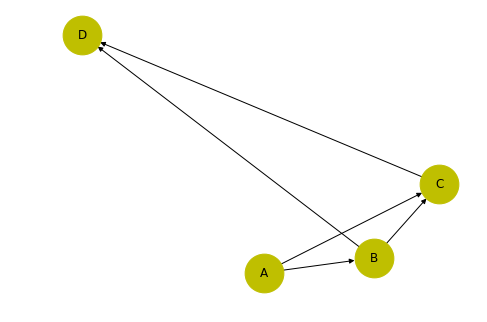

In [3]:
nx.draw(G, with_labels=True, node_size=1500, node_color='y', alpha=1, arrows=True)

In [4]:
def floyd_warshall(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for v in G:
        dist[v][v] = 0
    
    for s, t, d in G.edges(data=True):
        w = d.get(weight)
        dist[s][t] = w
        pred[s][t] = s
        if undirected:
            dist[t][s] = w
            pred[t][s] = t
            
    for w in G:
        for s in G:
            for t in G:
                if dist[s][t] > dist[s][w] + dist[w][t]:
                    dist[s][t] = dist[s][w] + dist[w][t]
                    pred[s][t] = pred[w][t]
                    
    return dict(pred), dict(dist)


def reconstruct_path(source, target, predecessors):
    if source == target:
        return []
    
    prev = predecessors[source]
    curr = prev[target]
    path = [target, curr]
    
    while curr != source:
        curr = prev[curr]
        path.append(curr)
        
    return list(reversed(path))


def print_distances(distances):
    for key, value in distances.items():
        print(key, dict(value));

In [5]:
predecessors, distances = floyd_warshall(G)

print("\nPredecessors\n", predecessors)

print("\nDistances")
print_distances(distances)
    
path = reconstruct_path('A', 'D', predecessors)
print("\nPath\n", path)


Predecessors
 {'A': {'B': 'A', 'C': 'A', 'D': 'B'}, 'B': {'C': 'B', 'D': 'B'}, 'C': {'D': 'C'}}

Distances
A {'A': 0, 'B': 4, 'C': 5, 'D': 6}
B {'B': 0, 'C': 3, 'D': 2, 'A': inf}
C {'C': 0, 'D': 2, 'A': inf, 'B': inf}
D {'D': 0, 'A': inf, 'B': inf, 'C': inf}

Path
 ['A', 'B', 'D']
